In [3]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import math

In [131]:
m = np.array([[1.0, 1.1], [1.1, 3.0]])

g = np.array([
    [2*m[0,0], m[0,1]],
    [m[1,0], 2*m[1,1]]
])


def fcn(x):
    return np.sum(np.dot(x, m)*x)

def grad(x):
    return np.dot(x, g)

eta = 0.1
w = 1.2

In [132]:
def momentum(x, w, eta, context):
    old_deltas = context
    deltas = -grad(x)*eta
    if context is None:
        context = np.zeros_like(deltas)
    deltas = context*w + deltas*(1.0-w)
    return deltas, deltas

In [133]:
def defered(x, w, eta, context):
    g = grad(x)
    p = context
    if p is None: p = np.zeros_like(g)
    p = (p+g)/2
    deltas = -p*eta
    return deltas, p

In [134]:
def descent(x, w, eta, context):
    g = grad(x)
    
    
    
    deltas = -g*eta
    if context is None:
        old_g = g
        old_deltas = deltas
        old_x = x
    else:
        old_deltas, old_g, old_x = context
    #f = np.sum(g*old_g)/math.sqrt(np.sum(g*g)*np.sum(old_g*old_g))
    f = np.sum(-old_deltas*g)/math.sqrt(np.sum(old_deltas*old_deltas)*np.sum(g*g))
    w = w*((1+f)/2)**2
    deltas = old_deltas*w + deltas*(1.0-w)
    print(x, f, w, deltas)
    return deltas, (deltas, g, old_x)
    

In [145]:
def stretch(x, w, eta, alpha, context):
    g = grad(x)
    old_deltas = context
    if old_deltas is not None:
        old_dir = old_deltas/np.sqrt(np.sum(old_deltas**2, axis=-1, keepdims=True))
        g_para = old_dir * np.sum(old_dir*g, axis=-1, keepdims=True)
        g_orto = g - g_para
        g = g_para * w + g_orto
    else:
        old_deltas = np.zeros_like(g)
    deltas = alpha*old_deltas - g*eta*(1.0-alpha)
    return deltas, deltas
    

0.0008480425278122744


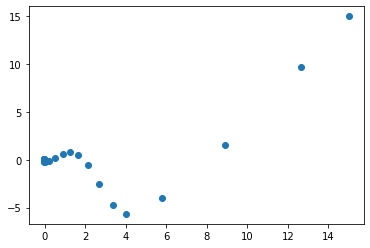

In [147]:
x = np.array([15.0, 15.0])
points = [x]
values = [fcn(x)]
context = None
w = 1.5
alpha = 0.5
for t in range(20):
    deltas, context = stretch(x, w, eta, alpha, context)
    x = x + deltas
    points.append(x)
    values.append(fcn(x))
    #print(t, x, fcn(x))
points = np.array(points)
values = np.array(values)
print(values[-1])
pyplot.scatter(points[:,0], points[:,1])

0.05338078072141266


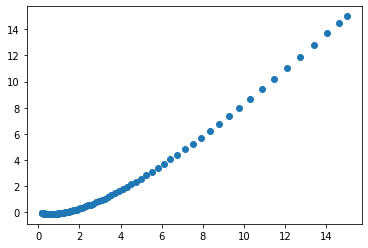

In [115]:
x = np.array([15.0, 15.0])
points = [x]
values = [fcn(x)]
context = None
for t in range(100):
    deltas, context = defered(x, w, eta, context)
    x = x + deltas
    points.append(x)
    values.append(fcn(x))
    #print(t, x, fcn(x))
points = np.array(points)
values = np.array(values)
print(values[-1])
pyplot.scatter(points[:,0], points[:,1])

0.0034966766442327698


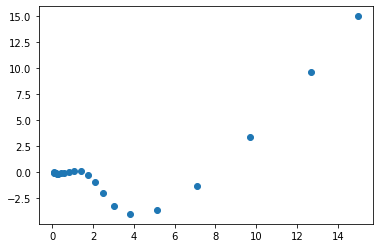

In [148]:
x = np.array([15.0, 15.0])
points = [x]
values = [fcn(x)]
context = None
w = 0.5
for t in range(20):
    deltas, context = momentum(x, w, eta, context)
    x = x + deltas
    points.append(x)
    values.append(fcn(x))
    #print(t, x, fcn(x))
points = np.array(points)
values = np.array(values)
print(values[-1])
pyplot.scatter(points[:,0], points[:,1])